# ** Naive Bayes Classifier from Scratch **

# Introduction

*Naive Bayes classifier, is a classifier based on Bayes Theorem with the naive
  assumption that features are independent of each other.

*In machine learning, naive Bayes classifiers are simple, probabilistic classifiers that use Bayes Theorem. In simple terms, a naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature
Naive Bayes models are easy to build. They are also very useful for very large datasets. Although, naive Bayes models are simple, they are known to outperform even the most highly sophisticated classification models. Because they also require a relatively short training time, they make a good alternative for use in classification problems

Mathematical Overview (Probability model):

Given a class variable y and a dependent feature vector x1 through xn, Bayes’ theorem states the following relationship:

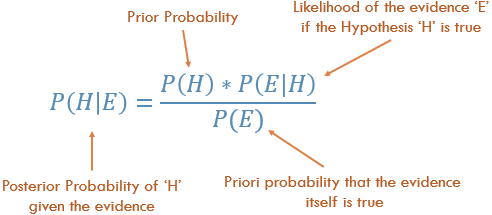

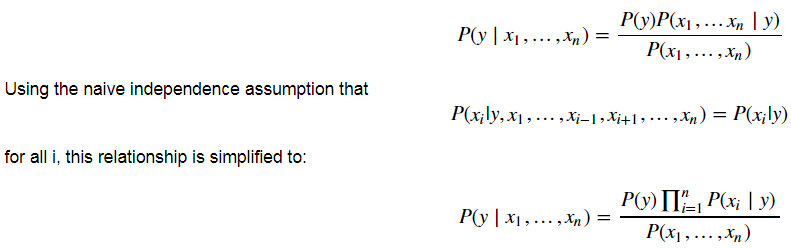

Advantages of Naive Bayes

1. When assumption of independent predictors holds true, a Naive Bayes classifier performs better as compared to other models like logistic regression as you need less training data
2. Naive Bayes requires a small amount of training data to estimate the test data. So, the training period is less.
3. It is easy to implement and also performs well in multi-class prediction
4. It performs well in the case of categorical input variables compared to a numerical variable(s). For the numerical variable, a normal distribution is assumed (bell curve, which is a strong assumption).

Disadvantages of Naive Bayes

1. Main imitation of Naive Bayes is the assumption of independent predictors. Naive Bayes implicitly assumes that all the attributes are mutually independent. In real life, it is almost impossible that we get a set of predictors which are completely independent.
2. If categorical variable has a category in test data set, which was not observed in training data set, then model will assign a 0 (zero) probability and will be unable to make a prediction.

applications:

1 . Real-time Prediction : As Naive Bayes is super fast,it can be used for making predictions in realtime.

2 . Multi-class Prediction: This algorithm can predict the posterior probability of multiple classes of the target variable.

3 . Text classification: Naive Bayes classifiers are mostly used in text classification

In [1]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
# 1.loading the data set
data = pd.read_csv('seeds')# read the csv data 
attributes = ['area','perimeter','compactness','length','width','asymmetry','groove','type']
data.columns = attributes 
data.head()

,area,perimeter,compactness,length,width,asymmetry,groove,type
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1


In [2]:
data.describe()

,area,perimeter,compactness,length,width,asymmetry,groove,type
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,14.917020,14.594596,0.870810,5.642545,3.265298,3.706683,5.421667,2.000000
std,2.927276,1.313651,0.023379,0.444635,0.379266,1.471047,0.493759,0.812341
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.315000,13.470000,0.856900,5.267000,2.953750,2.600250,5.046000,1.000000
50%,14.405000,14.360000,0.873450,5.541000,3.243500,3.634500,5.229500,2.000000
75%,17.502500,15.827500,0.886900,6.004000,3.565250,4.812000,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.315000,6.550000,3.000000


In [3]:
#import the required libraries
import csv
import random
import math

#load data from file
def loadCsv(filename):
    Data = csv.reader(open(filename, "r"))
    dataset = list(Data)
    for i in range(len(dataset)):
        dataset[i] = [float(x) for x in dataset[i]]
    return dataset

#split data into training set and test set
def splitDataset(dataset, splitRatio):
    trainSize = int(len(dataset) * splitRatio)
    trainSet = []
    copy = list(dataset)
    while len(trainSet) < trainSize:
        index = random.randrange(len(copy))
        trainSet.append(copy.pop(index))
    return [trainSet, copy]

#Now we group instances by class
def separateByClass(dataset):
    separated = {}
    for i in range(len(dataset)):
        vector = dataset[i]
        if (vector[-1] not in separated):
            separated[vector[-1]] = []
        separated[vector[-1]].append(vector)
    return separated

# we compute mean of a vector
def mean(numbers):
    return sum(numbers)/float(len(numbers))

#we compute std dev of a vector
def stdev(numbers):
    avg = mean(numbers)
    variance = sum([pow(x-avg,2) for x in numbers])/float(len(numbers)-1)
    return math.sqrt(variance)

#compute summaries where summary is mean and std dev of each column in a dataset
def summarize(dataset):
    summaries = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)]
    del summaries[-1]
    return summaries

#compute summaries for each group where a group is part of a dataset corresponding to a class.
def summarizeByClass(dataset):
    separated = separateByClass(dataset)
    summaries = {}
    for classValue, instances in separated.items():
        summaries[classValue] = summarize(instances)
    return summaries

#compute prob using a Gaussian distribution
def calculateProbability(x, mean, stdev):
    exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent

#compute P(x|C)
def calculateClassProbabilities(summaries, inputVector):
    probabilities = {}
    for classValue, classSummaries in summaries.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, stdev = classSummaries[i]
            x = inputVector[i]
            probabilities[classValue] *= calculateProbability(x, mean, stdev)
    return probabilities

#predict class label for an inputVector
def predict(summaries, inputVector):
    probabilities = calculateClassProbabilities(summaries, inputVector)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel

#predict class label for a test dataset
def getPredictions(summaries, testSet):
    predictions = []
    for i in range(len(testSet)):
        result = predict(summaries, testSet[i])
        predictions.append(result)
    return predictions

#compute accuracy of predictions for the test dataset
def getAccuracy(testSet, predictions):
    correct = 0
    for i in range(len(testSet)):
        if testSet[i][-1] == predictions[i]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

def naivebayes():
    filename = 'seeds'
    splitRatio = 0.75
    dataset = loadCsv(filename)
    trainingSet, testSet = splitDataset(dataset, splitRatio)
    summaries = summarizeByClass(trainingSet)
    predictions = getPredictions(summaries, testSet)
    accuracy = getAccuracy(testSet, predictions)
    print('predictions =',predictions)
    print('\naccuracy =',accuracy)
naivebayes()


predictions = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.0, 3.0]

accuracy = 94.0
